In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
data = pd.read_csv("isBot.csv")
df = DataFrame(data, columns=['Src IP',
'Src Port',
'Dst IP',
'Dst Port',
'Protocol',
'Flow Duration',
'Tot Fwd Pkts',
'Tot Bwd Pkts',
'isBot'])
df

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,isBot
0,8.6.0.1,0,8.0.6.4,0,0,59086131.0,7,1,0
1,147.32.84.180,137,147.32.84.255,137,17,12452268.0,37,1,1
2,147.32.84.180,1025,147.32.80.9,53,17,118741070.0,5,4,1
3,147.32.84.180,1040,94.63.149.152,80,6,180643.0,25,11,1
4,147.32.84.180,1040,94.63.149.152,80,6,440.0,4,1,1
...,...,...,...,...,...,...,...,...,...
356154,65.54.81.16,80,192.168.3.117,2476,6,27.0,1,1,0
356155,142.166.14.69,80,192.168.2.113,1387,6,174.0,0,2,0
356156,192.168.5.122,59564,198.164.30.2,53,17,383414.0,0,2,1
356157,192.168.5.122,43235,198.164.30.2,53,17,16505.0,0,2,1


In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
srcip = le.fit_transform(list(data['Src IP']))
srcport = le.fit_transform(list(data['Src Port']))
dstip = le.fit_transform(list(data['Dst IP']))
dstport = le.fit_transform(list(data['Dst Port']))
protocol = le.fit_transform(list(data['Protocol']))
flowdur = le.fit_transform(list(data['Flow Duration']))
bot = le.fit_transform(list(data['isBot']))
print (bot)
predict = bot

[0 1 1 ... 1 1 0]


In [12]:
from sklearn.model_selection import train_test_split

X = list(zip(srcip, srcport, dstip, dstport, protocol, flowdur))
y = list(bot)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# Завантаження бібліотек для методу
from sklearn.naive_bayes import GaussianNB

# Впровадження моделі Наївного Баєса
model = GaussianNB()
model.fit(x_train, y_train)

# Обрахунок Правильності
predicted = model.predict(x_test)
print(np.mean(predicted == y_test))


0.7849561994609164


In [15]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[42727  5912]
 [ 9406 13187]]


              precision    recall  f1-score   support

           0       0.82      0.88      0.85     48639
           1       0.69      0.58      0.63     22593

    accuracy                           0.78     71232
   macro avg       0.76      0.73      0.74     71232
weighted avg       0.78      0.78      0.78     71232



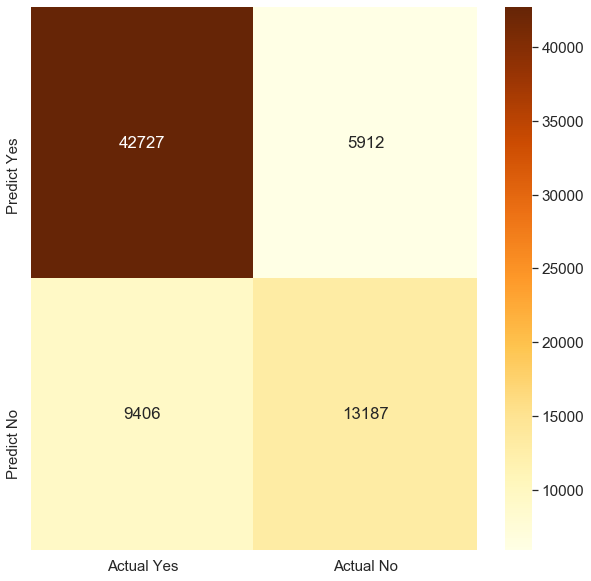

In [20]:
#Завантаження необхідних бібліотек
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Побудова матриці плутанини та обчислення показників якості: Точність, Відгук F1-оцiнка
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, predicted)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Yes', 'Actual No'], 
                                 index=['Predict Yes', 'Predict No'])
sns.set(font_scale=1.4)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.tick_params(labelsize=15);

print(classification_report(y_test, predicted))